In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [3]:
ticker = 'INTC'
start_date = '2023-01-01'

In [4]:
def import_stock_data(ticker, start):
    data = pd.DataFrame()

    stock = yf.Ticker(ticker)
    data =  stock.history(start=start)
    return data

In [4]:
data = import_stock_data(ticker, start = start_date)

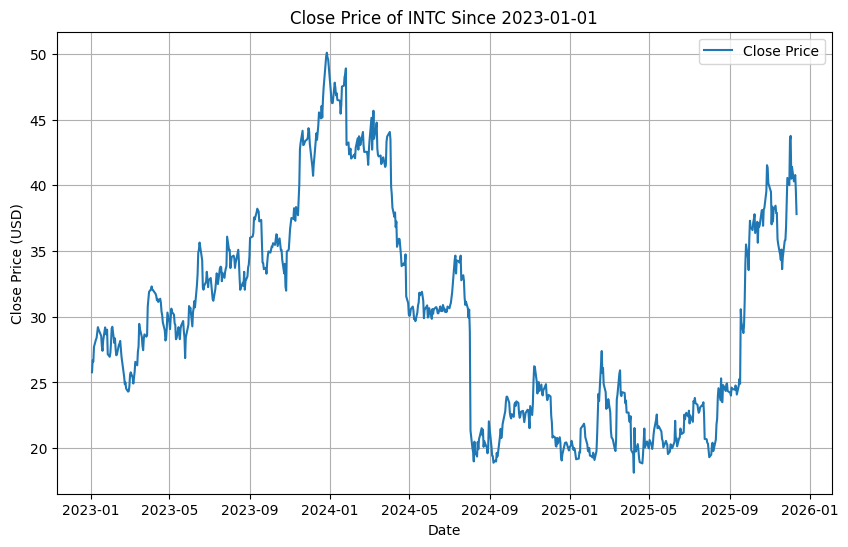

In [5]:
plt.figure(figsize=(10, 6))

#Plotting data harga close
plt.plot(data['Close'], label='Close Price') # plot harga penutupan saham
plt.title(f'Close Price of {ticker} Since {start_date}')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def log_returns(stock_data): 
    log_returns = np.log(1 + stock_data['Close'].pct_change())
    log_returns = log_returns.dropna()

    return log_returns

In [7]:
log_return = log_returns(data)

print(log_return.tail())

Date
2025-12-08 00:00:00-05:00   -0.027171
2025-12-09 00:00:00-05:00    0.004951
2025-12-10 00:00:00-05:00    0.006890
2025-12-11 00:00:00-05:00   -0.031638
2025-12-12 00:00:00-05:00   -0.043980
Name: Close, dtype: float64


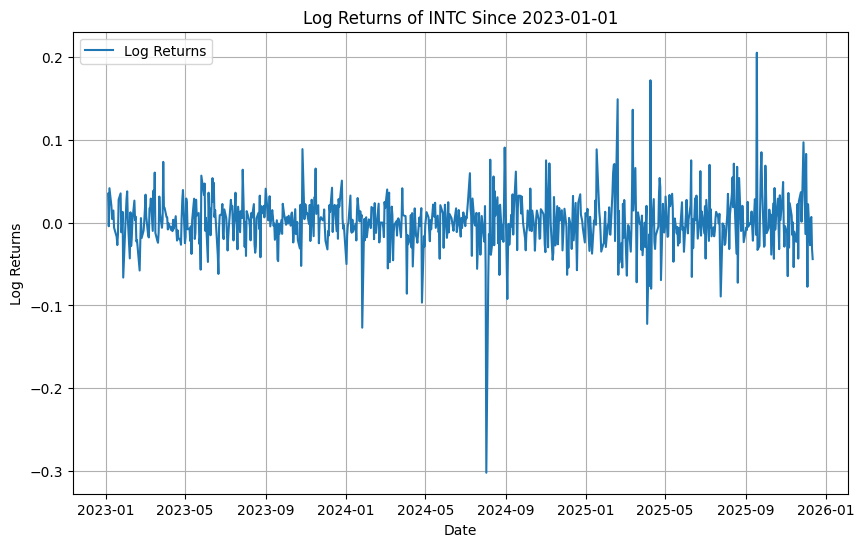

In [8]:
# Plotting log returns
plt.figure(figsize=(10, 6))
plt.plot(log_return, label='Log Returns')
plt.title(f'Log Returns of {ticker} Since {start_date}')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# fungsi untuk menghitung volatilitas harian 
def volatility_calc(lr):
    daily_volatility = np.std(lr) 
    return daily_volatility

log_return = log_returns(data)
print(volatility_calc(log_return)) 

NameError: name 'log_returns' is not defined

In [ ]:
# menampilkan volatilitas harian


0.03326481802242398


# **Monte Carlo**

In [11]:
num_simulations = 10
num_days = 30

last_prices = data['Close'].iloc[-1]

In [12]:
def monte_carlo_simulation(num_simulations, num_days, last_prices, log_return):
    # parameter harga dengan Geometric Brownian Motion
    mu = log_return.mean()
    sigma = volatility_calc(log_return)
    dt = 1  # 1 hari

    all_simulations = []

    for x in range(num_simulations):
        price_series = [last_prices]

        for y in range(1, num_days):
            price = price_series[-1] * np.exp(
                (mu - 0.5 * sigma**2) * dt
                + sigma * np.sqrt(dt) * np.random.normal()
            )
            price_series.append(price)

        all_simulations.append(price_series)

    simulation_df = pd.DataFrame(all_simulations).transpose()
    return simulation_df

In [13]:
log_return = log_returns(data)
simulation_df = monte_carlo_simulation(num_simulations , num_days , last_prices , log_return)

simulation_df.head()

,0,1,2,3,4,5,6,7,8,9
0,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001
1,36.838447,39.362820,36.612417,37.862853,37.351824,37.987803,37.629473,37.895362,38.495209,39.355496
2,38.148825,39.683171,37.120661,37.259386,36.706915,36.356236,37.611933,40.143953,38.870499,39.527089
3,39.076829,39.759911,37.766698,38.637579,35.336349,36.528659,37.822631,40.156192,40.412729,40.450611
4,39.902900,40.915502,39.523441,38.957643,33.950549,36.214886,37.689507,38.640563,41.055069,38.871179


Text(0, 0.5, 'Price')

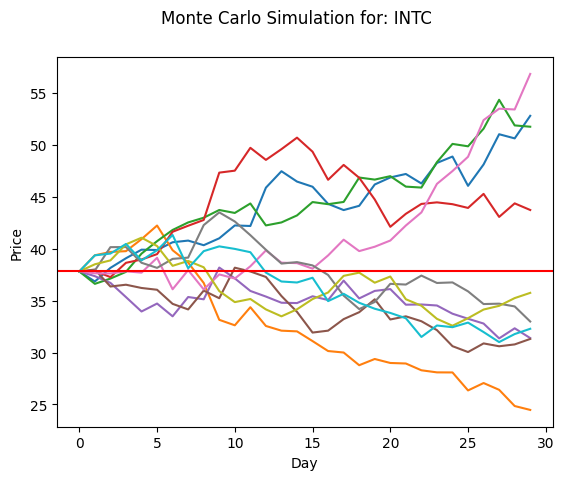

In [14]:
# plot hasil simulasi monte carlo
simulation_df.plot(legend=False)
plt.suptitle(f'Monte Carlo Simulation for: {ticker}')
plt.axhline(y = last_prices, color = 'r', linestyle= '-')
plt.xlabel('Day')
plt.ylabel('Price')

In [15]:
simulation_df

,0,1,2,3,4,5,6,7,8,9
0,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001,37.810001
1,36.838447,39.362820,36.612417,37.862853,37.351824,37.987803,37.629473,37.895362,38.495209,39.355496
2,38.148825,39.683171,37.120661,37.259386,36.706915,36.356236,37.611933,40.143953,38.870499,39.527089
3,39.076829,39.759911,37.766698,38.637579,35.336349,36.528659,37.822631,40.156192,40.412729,40.450611
4,39.902900,40.915502,39.523441,38.957643,33.950549,36.214886,37.689507,38.640563,41.055069,38.871179
5,39.868352,42.226817,40.718698,39.473917,34.716391,36.043647,39.119873,38.150736,40.253647,39.845866
6,40.615762,39.850361,41.801558,41.625650,33.487607,34.685822,36.090788,39.016410,38.348130,41.314677
7,40.776721,38.658971,42.525011,42.206215,35.345215,34.148977,37.933311,39.137127,38.815920,38.111050
8,40.332175,36.698146,42.978595,42.761374,35.124455,35.962767,36.075960,42.267110,38.207545,39.761373
9,40.997379,33.149378,43.722512,47.318541,38.179869,35.228497,37.521984,43.492150,35.915802,40.220914


In [16]:
final_prices = simulation_df.iloc[-1]

final_prices.describe()


count    10.000000
mean     39.326380
std      11.110691
min      24.475728
25%      31.614746
50%      34.365267
75%      49.734666
max      56.821380
Name: 29, dtype: float64